In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# <center> **BUSINESS UNDERSTANDING** <center/>
----
----


## Introduction

Salah satu dampak positif dari pesatnya perkembangan teknologi dan informasi bagi kehidupan manusia adalah kemudahan dalam mengakses informasi yang tidak terbatas pada ruang dan waktu. Inilah yang kemudian banyak diaplikasikan oleh penyedia produk dan jasa untuk memberikan kemudahan kepada calon pelanggan untuk mendapatkan informasi terkait produk/jasa hingga melakukan transaksi secara jarak jauh. Dalam industri perhotelan, peluang ini dimanfaatkan untuk penyediaan layanan reservasi secara online yang mememungkinkan para calon pelanggan untuk melakukan booking kamar dan servis dari jauh hari [Antonio, et al (2019)](https://reader.elsevier.com/reader/sd/pii/S2352340918315191?token=F10D385230C44E8F9B8A1A8C259584E038AE9988D403B56CA8FA20BF2989916B124077A6EA1655A3E26E85177F3D5AE8&originRegion=eu-west-1&originCreation=20220902124733).

Namun, keterbukaan informasi dan kemudahan dalam melakukan reservasi ini juga diiringi dengan kemudahan pelanggan untuk melakukan pembatalan reservasi. Hal ini akan memberikan ketidakpastian kepada hotel karena adanya kemungkinan pembatalan reservasi dalam waktu yang mendadak dapat menjadi kerugian yang harus ditanggung hotel karena kamar yang seharusnya terisi berakhir menjadi kamar kosong [Antonio, et al (2017)](https://drive.google.com/file/d/1uTVvq2zHr7h_ewAawe8fVR8dK9dqnej3/view?usp=sharing) 

Identifikasi yang dilakukan oleh [Chen dan Xie (2013)](https://drive.google.com/file/d/1yIRYqXT0pyztsBjNTc9Y68Y3g68KlSup/view?usp=sharing) dan [Chen, Schwartz, dan Vargas (2011)](https://daneshyari.com/article/preview/1010016.pdf), saat ini sebagian besar pelanggan melakukan pembatalan karena pelanggan ingin mendapatkan harga yang terbaik. Terkadang setelah melakukan pemesanan, pelanggan tetap melakukan pencarian lebih lanjut untuk product/service yang sama dengan yang sudah dipesan. Perilaku pelanggan yang seperti ini tentu akan berdampak pada kerugian yang harus ditanggung oleh hotel. 

Oleh sebab itu, hal ini perlu diberikan perhatian yang serius supaya keputusan-keputusan yang diambil yang terkait dengan kebijakan pembatalan reservasi tidak akan merugikan hotel dan pelanggan. Namun, sebagai penyedia layanan dan jasa, hotel juga tidak boleh terlalu kaku dalam menerapkan kebijakan karena ini bisa saja merusak reputasi hotel di mata pelanggan.

<br>





## Problem Statement

Pertanyaan yang ingin dijawab dalam projek ini antara lain:
1. Bagaimanakah parameter dan kinerja model machine learning yang dapat memprediksi pembatalan reservasi hotel dari dataset [Hotel Booking](https://reader.elsevier.com/reader/sd/pii/S2352340918315191?token=F10D385230C44E8F9B8A1A8C259584E038AE9988D403B56CA8FA20BF2989916B124077A6EA1655A3E26E85177F3D5AE8&originRegion=eu-west-1&originCreation=20220902124733)? 
2. Berapa besar potensial benefit yang bisa diperoleh apabila model yang dibangun diterapkan di industri?
3. Faktor-faktor apa sajakah yang mempengaruhi pelanggan untuk melakukan pembatalan reservasi hotel?

## Objectives

Dengan projek ini diharapkan false negatif hasil prediksi dapat diminamalkan, yaitu prediksi bahwa pelanggan yang tidak membatalkan reservasi namun sebenarnya melakukan pembatalan reservasi. Dengan begitu, maka besarnya kerugian dan faktor penyebabnya dapat diketahui untuk menjadi bahan kajian management hotel dalam melakukan pengambilan kebijakan dan perbaikan.



## Production Scenario

Ada banyak faktor yang berpengaruh terhadap pembatalan hotel oleh pelanggan. Akan tetapi, faktor-faktor tersebut dapat berubah sesuai dengan perkembangan teknologi dan kebutuhan pelanggan. Sehingga prediksi pembatalan reservasi kamar hotel dapat dimasukan dalam analisa bisnis secara berkala. Dalam hal ini beberapa rekomendasi yang dapat diberikan diantaranya:

1. Analisa dilakukan setelah melakukan perbaikan pada faktor paling berpengaruh sehingga dapat dilihat keefektifan perbaikan yang dilakukan terhadap kasus pembatalan reservasi kamar hotel
2. Analisa dilakukan secara periodic setiap satu bulan sekali dan dimasukan dalam pembahasan monthly management review

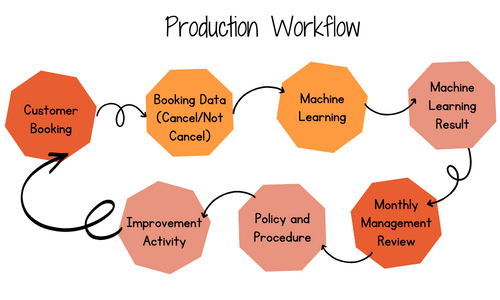

## Project Limitation

Model machine learning yang dibangun terbatas pada data pemesanan hotel di Portugal sejak 1 Juli 2015 - 31 Agustus 2017 dari dataset [Hotel Booking](https://reader.elsevier.com/reader/sd/pii/S2352340918315191?token=F10D385230C44E8F9B8A1A8C259584E038AE9988D403B56CA8FA20BF2989916B124077A6EA1655A3E26E85177F3D5AE8&originRegion=eu-west-1&originCreation=20220902124733) sehingga performa model akan jauh berbeda apabila digunakan untuk memprediksi pembatalan hotel di hari ini. Selain itu, model ini dibangun dari beberapa fitur yang terpilih berdasarkan domain knowledge dan analisis korelasi terhadap target (is_canceled).

## Metric Evaluation

Untuk mengukur kinerja model yang dibangun, maka metrik evaluasi yang akan digunakan dalam model ini adalah Recall

Recall = (True Positive) / (True Positive + False Negative)

dengan

Actual & Predicted | 0 (Predicted Not_Cancel) | 1 (Predicted Cancel)
-----|-----|-----
0 (Actual Not_Cancel)|True Negative (TN)|**False Positive** (FP)
1 (Actual Cancel)|**False Negative** (FN)| True Positive (TP)

Intepretasi:

- True Negative (TN) : Hasil prediksi menunjukan reservasi tidak dibatalkan dan hasil aktualnya tidak  dibatalkan.
- **False Positive** (FP) : Hasil prediksi menunjukan reservasi dibatalkan tetapi hasil aktualnya tidak dibatalkan . Dampak dari hasil ini adalah kemungkinan kehilangan pelanggan potensial.
- **False Negative** (FN) : Hasil prediksi ini menunjukan reservasi tidak dibatalkan akan tetapi hasil aktualnya dibatalkan. Dampak dari hasil ini adalah kehilangan pendapatan dan memberikan kerugian dari sisi efisiensi kerja dan financial hotel.
- True Positive (TP) : Hasil prediksi menunjukan reservasi dibatalkan dan hasil aktualnya reservasi dibatalkan.

Sehingga dengan menerapkan metrik recall, maka model machine learning yang dibangun ingin meminimalkan hasil prediksi yang **False Negative**, yaitu hasil prediksi yang menunjukkan reservasi tidak dibatalkan padahal sebetulnya dibatalkan.

# <center> **DATA UNDERSTANDING** <center/>
----
----


## Source

Dataset Resource: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

## Columns Description

**Attribute Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| hotel	| object | Hotel Type |
| is_canceled | int64 | Value indicating if the booking was canceled (1) or not (0) |
| lead_time	| int64	| Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
| arrival_date_year | int64 | Year of arrival date |
| arrival_date_month | object |	Month of arrival date with 12 categories: “January” to “December” |
| arrival_date_week_number | int64 | Week number of the arrival date |
| arrival_date_day_of_month | int64 | Day of the month of the arrival date |
| stays_in_weekend_nights | int64 | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
| stays_in_week_nights | int64	| Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel | 
| adults | int64 | Number of adults |
| children | float64 | Number of children |
| babies | int64 | Number of babies |
| meal | object | Type of meal booked |
| country | object | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
| market_segment | object | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
| distribution_channel	| object | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
| is_repeated_guest | int64 | Value indicating if the booking name was from a repeated guest (1) or not (0) |
| previous_cancellations | int64 | Number of previous bookings that were cancelled by the customer prior to the current booking |
| previous_bookings_not_canceled | int64 | Number of previous bookings not cancelled by the customer prior to the current booking |
| reserved_room_type | object | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
| assigned_room_type | object | Code for the type of room assigned to the booking |
| booking_changes | int64 | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation | 
| deposit_type | object | Indication on if the customer made a deposit to guarantee the booking |
| agent | float64 | ID of the travel agency that made the booking |
| company | float64 | ID of the company/entity that made the booking or responsible for paying the booking |
| days_in_waiting_list | int64 | Number of days the booking was in the waiting list before it was confirmed to the customer |
| customer_type	| object | Type of booking |
| adr | float64 | Average Daily Rate |
| required_car_parking_spaces | int64 | Number of car parking spaces required by the customer |
| total_of_special_requests | int64 | Number of special requests made by the customer (e.g. twin bed or high floor) |
| reservation_status | object | Reservation last status |
| reservation_status_date | object | Date at which the last status was set |

## Library

In [ ]:
# Library
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# library encoding

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.model_selection import train_test_split

# imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline # SMOTE

# scaling
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import RandomizedSearchCV

## Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final project/hotel_bookings.csv').reset_index(drop=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Hasil pemeriksaan keterisian dataset menunjukkan bahwa ada null value yang ditemukan pada kolom children, country, agent, dan company yang memerlukan penanganan lebih lanjut di tahap data cleaning.

### Duplicated Data

In [ ]:
df.duplicated().sum()

31994

Pada dataset ini diketahui bahwa data tidak memiliki unique id untuk membedakan satu baris dengan baris yang lainnya. Akan tetapi setelah dilakukan identifikasi lebih lanjut feature-feature yang ada cukup spesifik maka data diasumsikan merupakan data duplicate sehingga tetap tetap dihapus dari data set.
Didalam dataset ditemukan ada 31.994 data yang terduplikasi.

### Unique Values

In [ ]:
pd.set_option('display.max_colwidth', -1)
# data unit di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,hotel,2,"[Resort Hotel, City Hotel]"
1,is_canceled,2,"[0, 1]"
2,lead_time,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68, 18, 37, 12, 72, 127, 78, 48, 60, 77, 99, 118, 95, 96, 69, 45, 40, 15, 36, 43, 70, 16, 107, 47, 113, 90, 50, 93, 76, 3, 1, 10, 5, 17, 51, 71, 63, 62, 101, 2, 81, 368, 364, 324, 79, 21, 109, 102, 4, 98, 92, 26, 73, 115, 86, 52, 29, 30, 33, 32, 8, 100, 44, 80, 97, 64, 39, 34, 27, 82, 94, 110, 111, 84, 66, 104, 28, 258, 112, 65, 67, 55, 88, 54, 292, 83, 105, 280, 394, ...]"
3,arrival_date_year,3,"[2015, 2016, 2017]"
4,arrival_date_month,12,"[July, August, September, October, November, December, January, February, March, April, May, June]"
5,arrival_date_week_number,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]"
6,arrival_date_day_of_month,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
7,stays_in_weekend_nights,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18, 19, 10, 14]"
8,stays_in_week_nights,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12, 33, 20, 14, 16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35, 41]"
9,adults,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


# <center> **DATA CLEANING** <center/>
----
----


Data Cleaning dilakukan untuk menangani data duplikat, missing value, dan outliers pada dataset.

## Handling Duplicated Data

Data yang terduplikasi akan dikeluarkan dari dataset.

In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

## Handling Missing Value

In [ ]:
# Memeriksa banyak nilai null dan persentasenya di dalam dataset
num = df.isna().sum()
res = pd.concat([num,num/len(df)*100],axis=1,keys=['Banyak Null','Persentase Null'])
res

,Banyak Null,Persentase Null
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


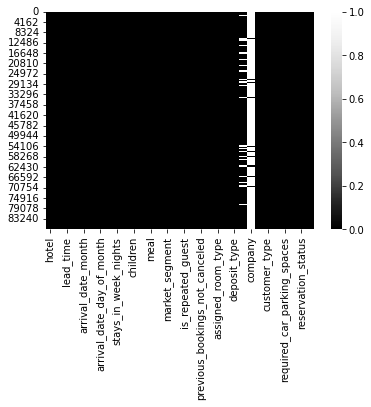

In [ ]:
#heat map missing value
sns.heatmap(df.isna(),cmap='Greys_r')
plt.show()

Merujuk pada artikel yang mendeskripsikan dataset ini, null value pada data-data ini bukan menandakan data hilang/kosong melainkan data tidak berlaku untuk reservasi tersebut. Seperti, null pada kolom agent berarti data reservasi tersebut tidak berasal dari agen perjalanan. Sehingga, data null pada dataset ini dapat diisi dengan variabel lain yang menandakan bahwa informasi tententu tidak berlaku pada data reservasi tersebut, misalnya dengan mengisikan angka nol "0" untuk tipe data numerik atau "NA" untuk data bertipe kategorikal.

### Null Value in Children

In [ ]:
df['children'].value_counts()

0.0     79028
1.0     4695 
2.0     3593 
3.0     75   
10.0    1    
Name: children, dtype: int64

In [ ]:
#Mengisi null value dengan 0
df['children'].fillna(0, inplace = True)
df[df['children'].isna()==True]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


### Null Value in Country

In [ ]:
df['country'].value_counts()

PRT    27453
GBR    10433
FRA    8837 
ESP    7252 
DEU    5387 
       ...  
MMR    1    
BFA    1    
CYM    1    
MLI    1    
KHM    1    
Name: country, Length: 177, dtype: int64

In [ ]:
#Mengisi null value dengan variabel 'NA'
df['country'].fillna('NA', inplace = True)
df[df['country'].isna()==True]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


### Null Value in Agent

In [ ]:
#Mengisi null value dengan 0
df['agent'].fillna(0, inplace = True)
df[df['agent'].isna()==True]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


### Null Value in Company

In [ ]:
df['company'].value_counts()

40.0     851
223.0    503
45.0     238
153.0    206
154.0    133
        ... 
10.0     1  
419.0    1  
415.0    1  
425.0    1  
534.0    1  
Name: company, Length: 352, dtype: int64

In [ ]:
#Mengisi null value dengan 0
df['company'].fillna(0, inplace = True)
df[df['company'].isna()==True]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


## Creating New Variable


### arrival_date_full

Variabel baru yang merupakan penggabungan dari variabel arrival_date_day_of_month, arrival_date_month, dan arrival_date_year untuk membentuk tanggal lengkap dengan format dd-mm-yyyy

In [ ]:
df['arrival_date_full'] = pd.to_datetime(df.arrival_date_year.astype(str) + '-' + df.arrival_date_month.astype(str) + '-' + df.arrival_date_day_of_month.astype(str))

### arrival_date_mmyy

Variabel baru yang berisikan bulan dan tahun dari reservasi hotel yang dilakukan oleh pelanggan

In [ ]:
df['arrival_date_mmyy'] = df.arrival_date_full.dt.to_period('M').astype('object')

### stays_in_all_nights

Variabel yang menjumlahkan data pada variabel stays_in_week_nights dengan stays_in_weekend_nights ke dalam variabel baru stays_in_all_nights

In [ ]:
df['stays_in_all_nights'] = df['stays_in_week_nights']+df['stays_in_weekend_nights']

### is_room_diff

Variabel baru yang mengindikasikan apakah ada perbedaan pada tipe kamar yang dipesan oleh pelanggan dengan tipe kamar yang kemudian didapatkan. Nilai 1 menandakan bahwa ada perbedaan tipe kamar sedangkan nilai 0 menandakan bahwa tipe kamar yang dipesan dan didapatkan adalah sama.

In [ ]:
df['is_room_diff'] = np.where(df['reserved_room_type']==df['assigned_room_type'],0,1)

In [ ]:
df['is_room_diff'].value_counts()

0    74287
1    13109
Name: is_room_diff, dtype: int64

### visitor

Variabel baru yang membagi antara pengunjung dari Portugal dengan negara lainnya. Alasannya adalah data diambil di Negara Portugal yang menjadikan pengunjung dari negara Portugal adalah pengunjung lokal dan pengunjung dari negara lain sebagai pengunjung International. Nantinya pada kolom visitor pengunjung lokal akan diberikan nilai 0 dan pengunjung international akan diberikan nilai 1

In [ ]:
def country(x):
    if x == 'PRT':
        return 0
    else:
        return 1

In [ ]:
df['visitor'] = df['country'].apply(country)

## Handling Outlier

Outliers adalah data yang menyimpang terlalu jauh dari data yang lainnya dalam suatu rangkaian data (pencilan). Adanya data outliers ini akan membuat analisis terhadap serangkaian data menjadi bias, atau tidak mencerminkan fenomena yang sebenarnya. Istilah outliers juga sering dikaitkan dengan nilai esktrem, baik ekstrem besar maupun ekstrem kecil.

### Check Data Distribution

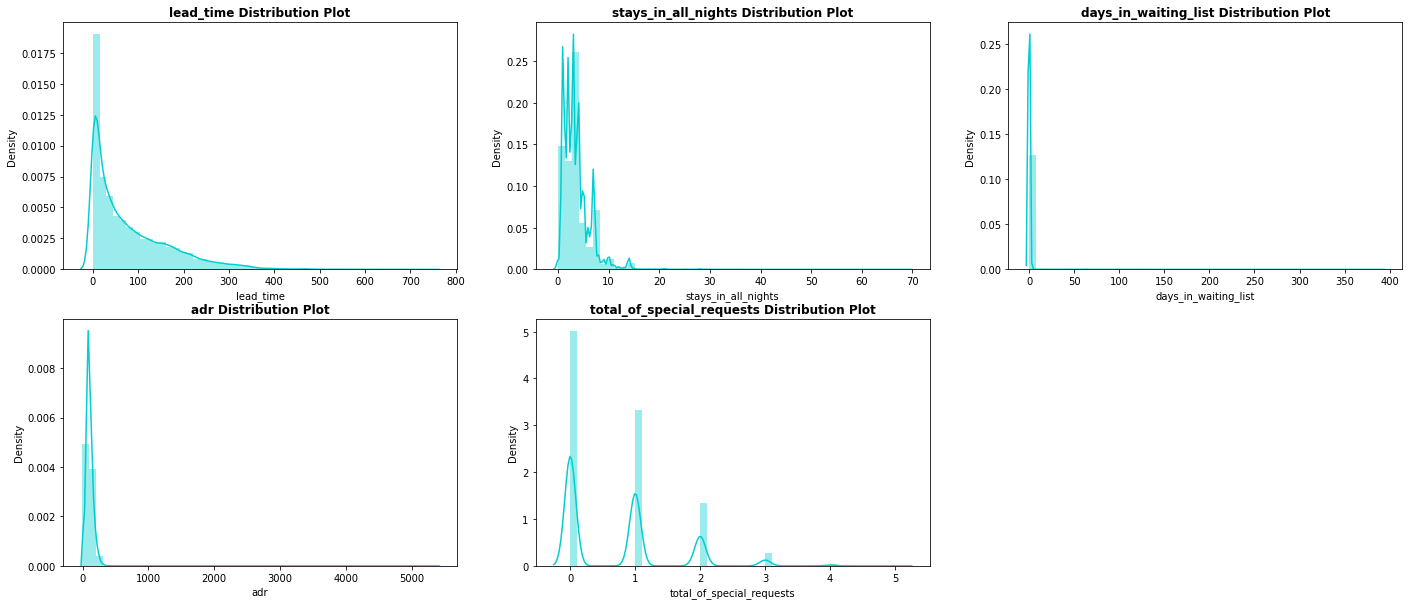

In [ ]:
plt.figure(figsize=(24, 10))

plt.subplot(2,3,1)
sns.distplot(df['lead_time'],color='darkturquoise')
plt.title('lead_time Distribution Plot', size=12, weight='bold');

plt.subplot(2,3,2)
sns.distplot(df['stays_in_all_nights'],color='darkturquoise')
plt.title('stays_in_all_nights Distribution Plot', size=12, weight='bold');


plt.subplot(2,3,3)
sns.distplot(df['days_in_waiting_list'],color='darkturquoise')
plt.title('days_in_waiting_list Distribution Plot', size=12, weight='bold');

plt.subplot(2,3,4)
sns.distplot(df['adr'],color='darkturquoise')
plt.title('adr Distribution Plot', size=12, weight='bold');

plt.subplot(2,3,5)
sns.distplot(df['total_of_special_requests'],color='darkturquoise')
plt.title('total_of_special_requests Distribution Plot', size=12, weight='bold');

plt.show()

Dari lima variabel yang diperiksa distribusi datanya, tidak ada satupun variabel yang berdistribusi normal dan semua variabel tersebut terdapat right-skewed atau skewnes positif. Oleh sebab itu, diperlukan pengecekan outlier untuk kemudian ditangani secara lebih lanjut.

### Check Outliers

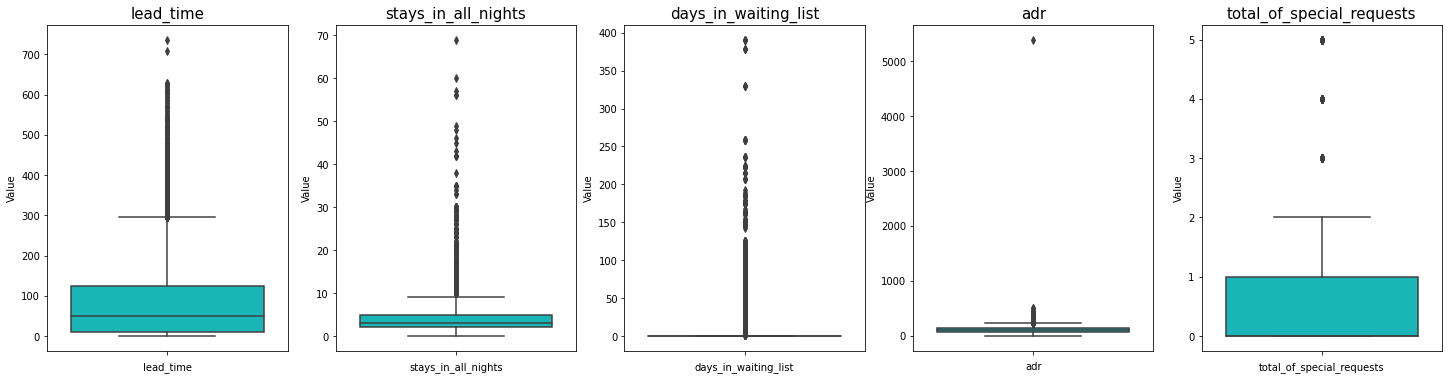

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,5,1)
sns.boxplot(y=df['lead_time'],color='darkturquoise') 
plt.title('lead_time', size = 15)
plt.xlabel('lead_time') 
plt.ylabel('Value')

plt.subplot(1,5,2)
sns.boxplot(y=df['stays_in_all_nights'],color='darkturquoise') 
plt.title('stays_in_all_nights', size = 15)
plt.xlabel('stays_in_all_nights') 
plt.ylabel('Value')

plt.subplot(1,5,3)
sns.boxplot(y=df['days_in_waiting_list'],color='darkturquoise') 
plt.title('days_in_waiting_list', size = 15)
plt.xlabel('days_in_waiting_list') 
plt.ylabel('Value')

plt.subplot(1,5,4)
sns.boxplot(y=df['adr'],color='darkturquoise') 
plt.title('adr', size = 15)
plt.xlabel('adr') 
plt.ylabel('Value')

plt.subplot(1,5,5)
sns.boxplot(y=df['total_of_special_requests'],color='darkturquoise') 
plt.title('total_of_special_requests', size = 15)
plt.xlabel('total_of_special_requests') 
plt.ylabel('Value')
plt.show()



Dari lima variabel yang dicek outliernya, ternyata kelimanya memiliki data yang outlier sehingga akan dilakukan perekayasaan data dengan mempertimbangkan hasil antara kombinasi perhitungan IQR dengan domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [ ]:
# Membuat fungsi untuk mengecek outliers
def Outliers_check(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    batas_bawah = q1 - limit
    batas_atas = q3 + limit
    print(f'batas_bawah: {batas_bawah}')
    print(f'batas_atas: {batas_atas}')

#### lead_time

In [ ]:
Outliers_check(df['lead_time'])

IQR: 114.0
batas_bawah: -160.0
batas_atas: 296.0


In [ ]:
df[df['lead_time'] > 296].count()['lead_time'] 

2396

In [ ]:
df = df[(df['lead_time'] <= 296)]  #menghapus reservasi dengan jarak pemesanan lebih dari 296 hari

Berdasarkan nilai IQR, batas atas dari **lead_time** adalah 296 hari. Batas atas tersebut akan dijadikan sebagai treshhold untul filter dari variabel **lead_time**.

#### stays_in_all_nights

In [ ]:
Outliers_check(df['stays_in_all_nights'])

IQR: 3.0
batas_bawah: -2.5
batas_atas: 9.5


In [ ]:
df[df['stays_in_all_nights'] > 10].count()['stays_in_all_nights']

1760

In [ ]:
df = df[(df['stays_in_all_nights'] <= 10)] #menghapus reservasi dengan durasi menginap lebih dari 10 hari

Berdasarkan nilai IQR, batas atas dari **stays_in_all_nights** adalah 10 (nilai absolut). Nilai tersebut akan dijadikan sebagai filter dari variabel **stays_in_all_night**

#### adr

In [ ]:
Outliers_check(df['adr'])

IQR: 62.5
batas_bawah: -21.25
batas_atas: 228.75


In [ ]:
df[df['adr'] > 227].count()['adr'] 

2414

In [ ]:
df = df[(df['adr'] > 0) & (df['adr'] <= 227)] #menghapus pelanggan yang memesan kamar hotel dengan harga lebih dari batas atas adr

Berdasarkan nilai IQR, batas atas dari nilai **adr** adalah 227 dan batas bawahnya adalah -21. Pada variabel ini terdapat anomali yang dirasa kurang relevan yaitu adanya data yang nilainya minus. Data minus tersebut akan dihapus sehingga batas bawah dari data ini adalah 0

#### total_of_special_request

In [ ]:
Outliers_check(df['total_of_special_requests'])

IQR: 1.0
batas_bawah: -1.5
batas_atas: 2.5


In [ ]:
df[df['total_of_special_requests'] > 3].count()['total_of_special_requests'] 

287

In [ ]:
df = df[(df['total_of_special_requests'] <= 3)] #menghapus pelanggan yang memiliki pesanan khusus lebih dari 3

Berdasarkan nilai IQR, batas atas dari nilai  **total_of_special_request** adalah 3 (nilai absolut). Nilai tersebut dijadikan sebagai filter dari total_of_special_request, yang mana nilai yang lebih tinggi dari 3 akan dihapus

#### days_in_waiting_list

In [ ]:
Outliers_check(df['days_in_waiting_list'])

IQR: 0.0
batas_bawah: 0.0
batas_atas: 0.0


In [ ]:
df['days_in_waiting_list'].value_counts(normalize='index').head(20)
# IQR, batas bawah dan batas atas 0 semua karena 99% kolom days_in_waiting_list adalah data 0

0      0.990969
63     0.000672
87     0.000317
44     0.000292
15     0.000279
58     0.000266
48     0.000254
77     0.000216
27     0.000203
34     0.000190
4      0.000190
147    0.000178
122    0.000178
178    0.000152
50     0.000152
59     0.000152
31     0.000152
176    0.000140
187    0.000127
60     0.000127
Name: days_in_waiting_list, dtype: float64

Batas bawah dan batas atas days_in_waiting_list adalah 0 karena 99% data di kolom days_in_waiting_list bernilai 0, sehingga tidak diperlukan filtering data

### Data Distribution After Outliers Handling

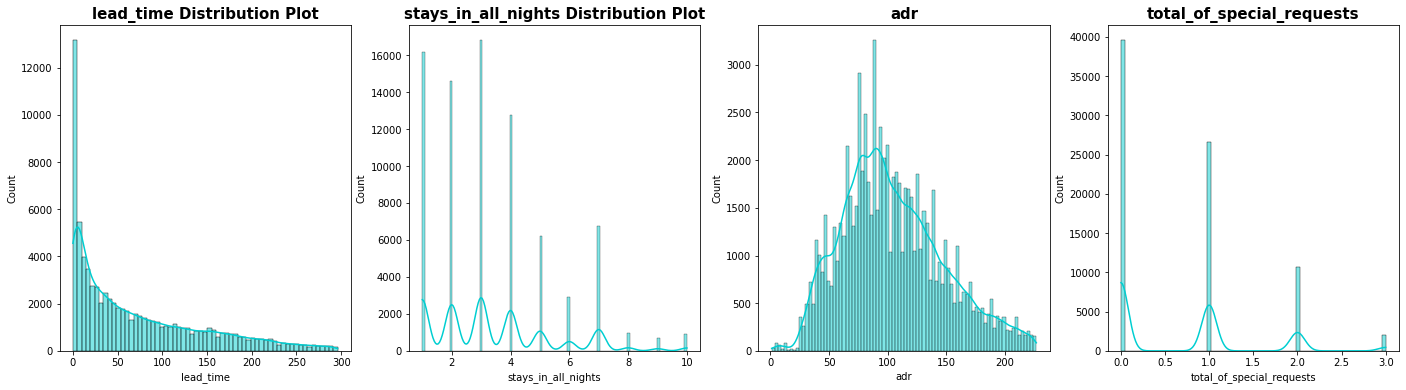

In [ ]:
plt.figure(figsize=(24, 6))

plt.subplot(1,4,1)
sns.histplot(df['lead_time'],kde=True,color='darkturquoise')
plt.title('lead_time Distribution Plot', size=15, weight='bold');

plt.subplot(1,4,2)
sns.histplot(df['stays_in_all_nights'],kde=True,color='darkturquoise')
plt.title('stays_in_all_nights Distribution Plot', size=15, weight='bold');

plt.subplot(1,4,3)
sns.histplot(df['adr'],kde=True,color='darkturquoise')
plt.title('adr', size=15, weight='bold');

plt.subplot(1,4,4)
sns.histplot(df['total_of_special_requests'],kde=True,color='darkturquoise')
plt.title('total_of_special_requests', size=15, weight='bold');

plt.show()

## Clean Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78837 entries, 2 to 87395
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           78837 non-null  object        
 1   is_canceled                     78837 non-null  int64         
 2   lead_time                       78837 non-null  int64         
 3   arrival_date_year               78837 non-null  int64         
 4   arrival_date_month              78837 non-null  object        
 5   arrival_date_week_number        78837 non-null  int64         
 6   arrival_date_day_of_month       78837 non-null  int64         
 7   stays_in_weekend_nights         78837 non-null  int64         
 8   stays_in_week_nights            78837 non-null  int64         
 9   adults                          78837 non-null  int64         
 10  children                        78837 non-null  float64       
 11  ba

## Export Clean Dataset

Dataset yang sudah dibersihkan kemudian dieksport ke dalam file .csv

In [ ]:
#Eksport dataset yang sudah bersih
df.to_csv('/content/drive/MyDrive/final project/hotel_bookings_clean.csv') 

# <center> **EXPLORATORY DATA ANALYSIS** <center/>
----
----


## 1. Dependent Variable

### 1.1 is_canceled

Karena tujuan dari projek ini adalah untuk melakukan prediksi reservasi yang dibatalkan, maka variabel dependent atau target dari klasifikasi dalam projek ini adalah kolom ***is_canceled***.

In [ ]:
df['is_canceled'].value_counts()

0    57614
1    21223
Name: is_canceled, dtype: int64

Namun, banyaknya data reservasi yang tidak dibatalkan dan dibatalkan di dalam dataset diketahui memiliki proporsi yang tidak seimbang dengan rasio 73:27. Perbedaan proporsi ini perlu diperhatikan saat pembagian data training dan testing untuk menghindari bias pada model yang akan dibagun.

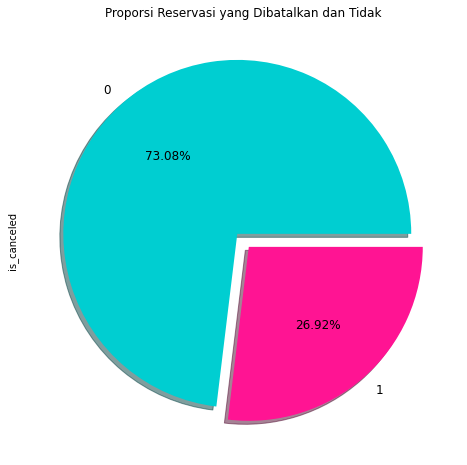

In [ ]:
plt.figure(figsize=(5,5))
df['is_canceled'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.2f%%', shadow=True, figsize=(8, 8), fontsize=12,colors=['darkturquoise','deeppink'])
plt.title('Proporsi Reservasi yang Dibatalkan dan Tidak')
plt.show()

## 2. Independent Variables

Untuk membatasi lingkup projek, maka variabel-variabel yang berdasarkan deskripsinya tidak terkait dengan latar belakang dan pengalaman pelanggan dalam membuat reservasi hotel tidak akan digunakan dalam analisis selanjutnya seperti company dan reservation_status. Selain itu, variabel-variabel yang telah diekstrak menjadi variabel baru juga tidak disertakan dalam analisis. Dengan demikian, variabel-variabel yang diamati antara lain:

* hotel
* lead time
* country
* market segment
* is_repeated_guest
* previous_cancellation
* previous_bookings_not_canceled
* booking_changes
* deposit_type
* agent
* days_in_waiting_list
* customer_type
* adr
* required_car_parking_spaces
* total_of_special_requests
* arrival_date_full
* arrival_date_mmyy
* stays_in_all nights
* is_room_diff
* visitor

In [ ]:
df1 = df[['hotel', 'lead_time','country', 'market_segment','is_repeated_guest', 'previous_cancellations','previous_bookings_not_canceled','booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr','required_car_parking_spaces','total_of_special_requests','arrival_date_full','arrival_date_mmyy','stays_in_all_nights','is_room_diff','visitor','is_canceled']]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78837 entries, 2 to 87395
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           78837 non-null  object        
 1   lead_time                       78837 non-null  int64         
 2   country                         78837 non-null  object        
 3   market_segment                  78837 non-null  object        
 4   is_repeated_guest               78837 non-null  int64         
 5   previous_cancellations          78837 non-null  int64         
 6   previous_bookings_not_canceled  78837 non-null  int64         
 7   booking_changes                 78837 non-null  int64         
 8   deposit_type                    78837 non-null  object        
 9   agent                           78837 non-null  float64       
 10  days_in_waiting_list            78837 non-null  int64         
 11  cu

### Numerical Variables Distribution

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,78837.0,72.002093,72.991176,0.0,11.0,47.0,116.0,296.0
is_repeated_guest,78837.0,0.035440,0.184891,0.0,0.0,0.0,0.0,1.0
previous_cancellations,78837.0,0.028946,0.375838,0.0,0.0,0.0,0.0,26.0
previous_bookings_not_canceled,78837.0,0.177708,1.731466,0.0,0.0,0.0,0.0,72.0
booking_changes,78837.0,0.253713,0.680331,0.0,0.0,0.0,0.0,17.0
agent,78837.0,77.387787,108.152876,0.0,9.0,9.0,177.0,535.0
days_in_waiting_list,78837.0,0.601482,8.112537,0.0,0.0,0.0,0.0,259.0
adr,78837.0,104.354442,43.163622,1.0,74.0,98.1,131.0,227.0
required_car_parking_spaces,78837.0,0.084415,0.281817,0.0,0.0,0.0,0.0,8.0
total_of_special_requests,78837.0,0.684374,0.799812,0.0,0.0,0.0,1.0,3.0


### Categorical Variables Distribution

In [ ]:
df1.describe(include=['O']).T

,count,unique,top,freq
hotel,78837,2,City Hotel,49831
country,78837,175,PRT,23919
market_segment,78837,8,Online TA,47725
deposit_type,78837,3,No Deposit,77994
customer_type,78837,4,Transient,65590
arrival_date_mmyy,78837,26,2017-05,4079


## 2. Data Analysis and Visualization

### 2.1 Reservation Cancellations

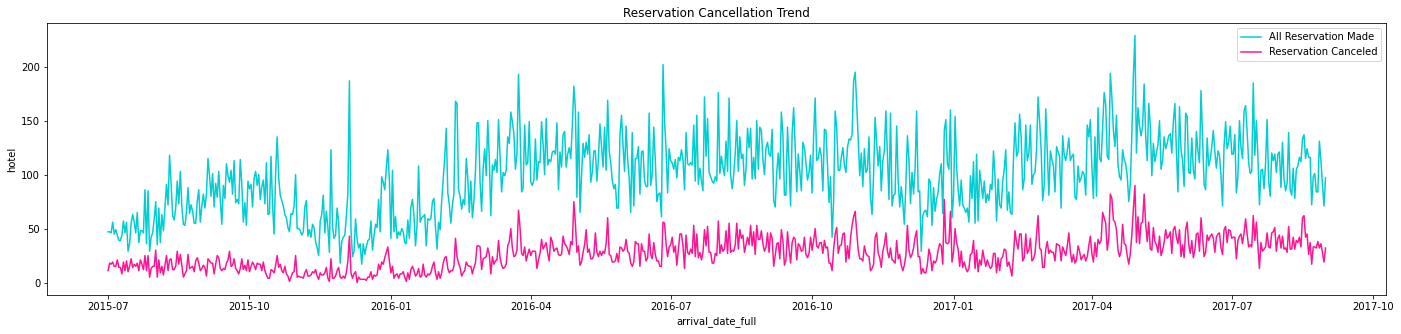

In [ ]:
plt.figure(figsize=(24,5))

num_reservation_all = df1.groupby(['arrival_date_full']).count().reset_index()
sns.lineplot(data=num_reservation_all,x="arrival_date_full",y="hotel",color='darkturquoise',label='All Reservation Made')

num_reservation_canceled = df1.groupby(['arrival_date_full']).sum()['is_canceled'].reset_index()
sns.lineplot(data=num_reservation_canceled,x="arrival_date_full",y="is_canceled",color='deeppink',label='Reservation Canceled')

plt.title('Reservation Cancellation Trend')
plt.show()

Pada grafik diatas, dapat dilihat bahwa ada pola yang khas yang menunjukkan peningkatan reservasi di bulan April, Agustus, dan Desember pada tiga tahun pengamatan di atas. Hal ini dapat dipahami karena tiga bulan tersebut merupakan waktu libur untuk negara-negara empat musim yaitu untuk libur musim semi, musim panas, dan musim dingin. Namun, peningkatan ini juga diiringi dengan peningkatan pembatalan reservasi pada bulan-bulan tersebut.

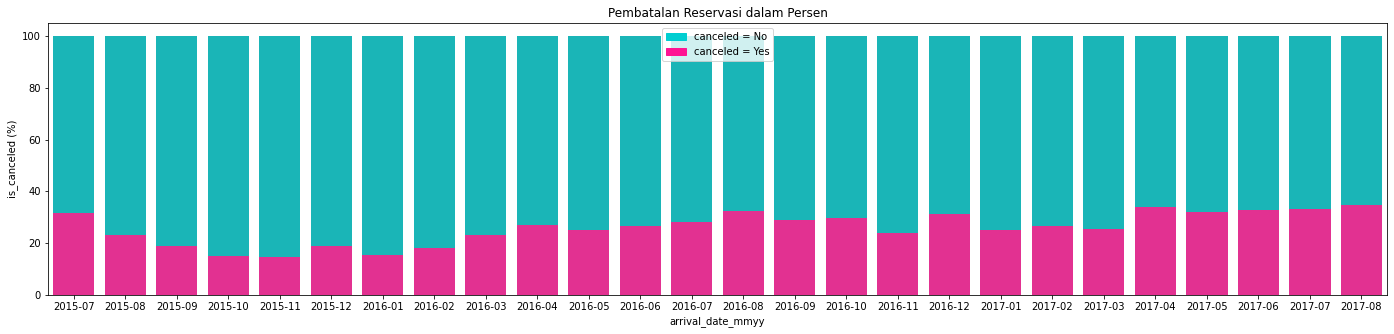

In [ ]:
plt.figure(figsize=(24, 5))

# bar chart 1 -> top bars (group of 'canceled=No')
total = df1.groupby(df1['arrival_date_mmyy']).agg('count')[['hotel','is_canceled']].reset_index()
total['hotel'] = [i / j * 100 for i,j in zip(total['hotel'], total['hotel'])]
bar1 = sns.barplot(x="arrival_date_mmyy",  y="hotel", data=total, color='darkturquoise')
top_bar = mpatches.Patch(color='darkturquoise', label='canceled = No')

# bar chart 2 -> bottom bars (group of 'canceled=Yes')
canceled = df1.groupby(df1['arrival_date_mmyy']).agg('sum')['is_canceled'].reset_index()
canceled['is_canceled'] = [i / j * 100 for i,j in zip(canceled['is_canceled'], total['is_canceled'])]
bar2 = sns.barplot(x="arrival_date_mmyy", y="is_canceled", data=canceled, color='deeppink')
bottom_bar = mpatches.Patch(color='deeppink', label='canceled = Yes')

plt.legend(handles=[top_bar, bottom_bar])
plt.title('Pembatalan Reservasi dalam Persen')
plt.ylabel('is_canceled (%)')
plt.show()

Lebih lanjut, tingkat pembatalan reservasi pada bulan April, Agustus, dan Desember ini secara persentase juga relatif lebih tinggi dibandingkan bulan-bulan sebelum dan setelahnya.

### 2.2 Customer Preferences

##### 2.2.1 Tipe Hotel Pilihan Pelanggan

In [ ]:
cp_hotel = df1['hotel'].value_counts()
cp_hotel

City Hotel      49831
Resort Hotel    29006
Name: hotel, dtype: int64

In [ ]:
cp_hotel_canceled = df1[['hotel','is_canceled']].value_counts().reset_index().sort_values(by='hotel')
cp_hotel_canceled

,hotel,is_canceled,0
0,City Hotel,0,35111
2,City Hotel,1,14720
1,Resort Hotel,0,22503
3,Resort Hotel,1,6503


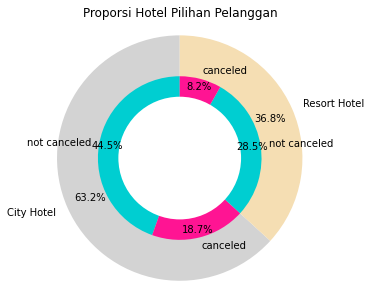

In [ ]:
plt.figure(figsize=(6, 5))

plt.pie(cp_hotel, labels=cp_hotel.reset_index()['index'], autopct='%1.1f%%', pctdistance=0.8, startangle=90,frame=True, radius=3, colors=['lightgrey','wheat'])
plt.pie(cp_hotel_canceled[0], labels=['not canceled','canceled','not canceled','canceled'], autopct='%1.1f%%', pctdistance=0.9, startangle=90, radius=2, colors=['darkturquoise','deeppink'])

centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.title('Proporsi Hotel Pilihan Pelanggan')
plt.show()

Dari hasil distribusi data preferensi hotel yang diminati oleh pelanggan, diketahui bahwa 63.2% pelanggan lebih memilih city hotel dibandingkan resort hotel yang hanya 36.8%.

Jika dilihat lebih lanjut, tingkat pembatalan untuk reservasi city hotel lebih tinggi dari resort hotel dengan skor 0.29 dan 0.22.

In [ ]:
pd.crosstab(index=df1['hotel'], columns=df1['is_canceled'],normalize='index').T

hotel,City Hotel,Resort Hotel
is_canceled,,
0,0.704602,0.775805
1,0.295398,0.224195


##### 2.2.2 Harga Sewa Hotel

Jika dianalisis lebih lanjut, maka dapat diketahui bahwa rata-rata biaya sewa hotel yang dibatalkan relatif lebih tinggi daripada yang tidak dibatalkan.

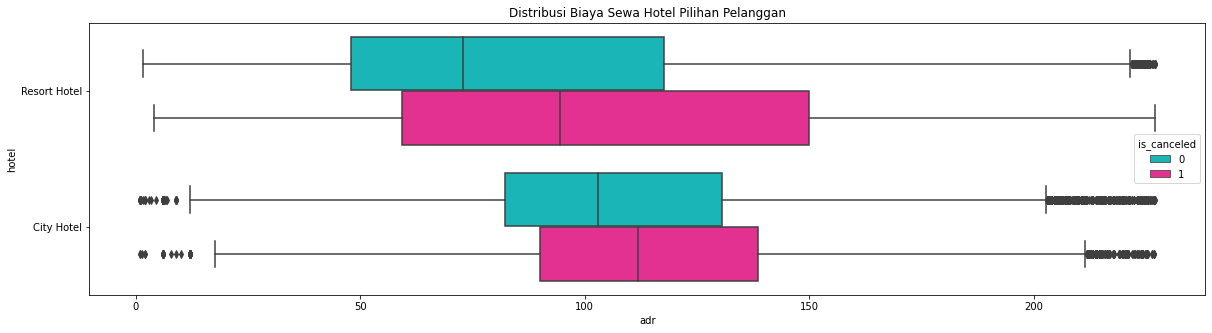

In [ ]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df1, x='adr',y='hotel',hue='is_canceled',palette=['darkturquoise','deeppink'])
plt.title('Distribusi Biaya Sewa Hotel Pilihan Pelanggan')
plt.show()

##### 2.2.3 Ketersediaan Lahan Parkir

Selain itu, ketersediaan lahan parkir juga termasuk ke dalam pertimbangan pelanggan dalam membuat reservasi hotel.

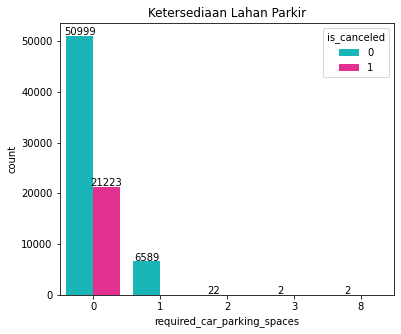

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df1,x='required_car_parking_spaces',hue='is_canceled',palette=['darkturquoise','deeppink'])
for p in ax.patches:
 height = p.get_height()
 ax.text(x = p.get_x()+(p.get_width()/2),
        y = height+200,
        s = '{:.0f}'.format(height),
        ha = 'center')
plt.title('Ketersediaan Lahan Parkir')
plt.show()

Dilihat dari hubungan **required_car_parking_spaces** dengan **Is_canceled** di indikasikan bahwa pelanggan yang sebelumnya meminta ketersediaan parkir mobil memiliki kecenderungan tidak membatalkan pesanannya, maka dari itu akan dilakukan penyederhaan dimana ketika seseorang meminta ketersediaan lahan parkir akan dirubah menjadi value 1 dan jika tidak meminta ketersediaan lahan parkir akan menjadi value 0.

In [ ]:
df1['required_car_parking_spaces'] = np.where(df1['required_car_parking_spaces'] == 0,0,1)

In [ ]:
pd.crosstab(index=df1['required_car_parking_spaces'], columns=df1['is_canceled'], normalize='index').T

required_car_parking_spaces,0,1
is_canceled,,
0,0.706142,1.0
1,0.293858,0.0


Sehingga dapat disimpulkan bahwa, pelanggan yang membutuhkan lahan parkir untuk kendaraan mereka cenderung tidak akan membatalkan pesanan kamar hotelnya.

### 2.3 Reservation Properties

##### 2.3.1 Pembuatan Reservasi

Lead time adalah jumlah hari dari waktu pembuatan reservasi hingga waktu pelanggan akan menginap. Jika dilihat pada grafik di bawah, reservasi dengan tingkat pembatalan yang tinggi tentu ada pada reservasi dengan lead_time yang jauh. Namun, perlu diperhatikan bahwa reservasi yang dengan lead_time yang singkat ini berjumlah sangat banyak, begitupun juga pada variabel booking_changes. 

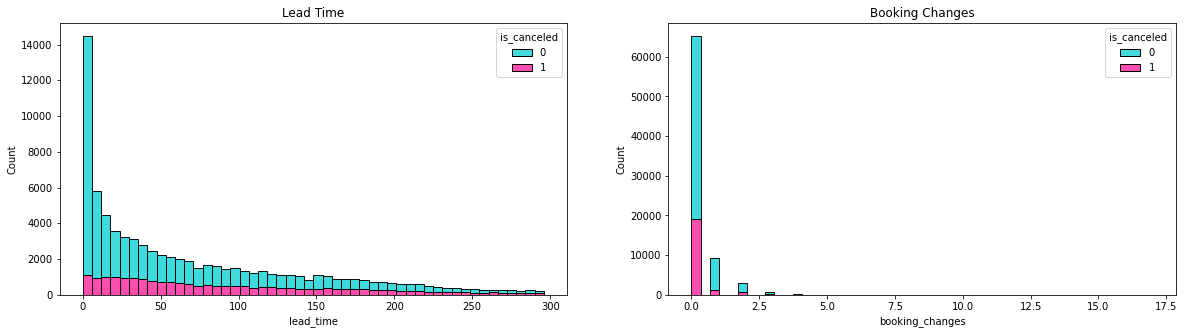

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.histplot(data=df1,x='lead_time',hue='is_canceled',multiple="stack",palette=['darkturquoise','deeppink'],bins=50)
plt.title('Lead Time')

plt.subplot(1,2,2)
sns.histplot(data=df1,x='booking_changes',hue='is_canceled',multiple="stack",palette=['darkturquoise','deeppink'],bins=50)
plt.title('Booking Changes')
plt.show()

Pada reservasi dengan perubahan detil booking 0, tingkat pembatalannya memang lebih tinggi. Namun, ini tidak sebanding dengan proporsi data reservasi dengan booking changes selain 0.

##### 2.3.2 Durasi Menginap

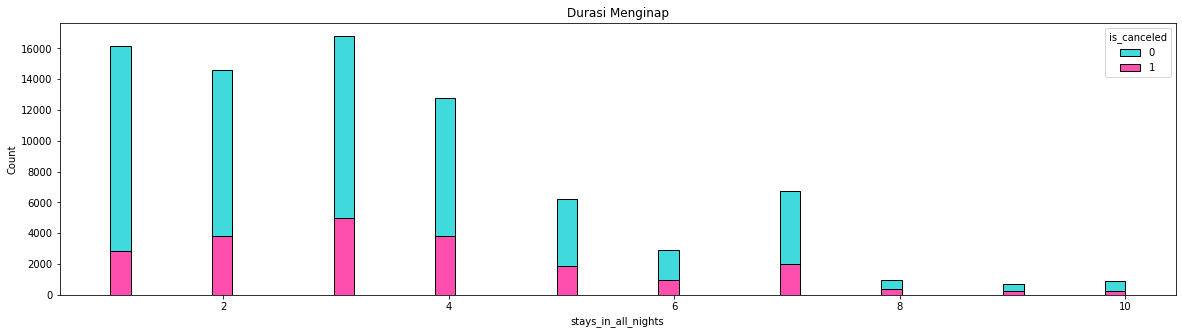

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(data=df1,x='stays_in_all_nights',hue='is_canceled',multiple="stack",palette=['darkturquoise','deeppink'],bins=50)
plt.title('Durasi Menginap')
plt.show()

Dari grafik di atas, dapat dilihat tingkat bahwa pembatalan reservasi paling rendah terjadi pada reservasi dengan durasi menginap satu malam.

##### 2.3.3 Kinerja Agen Reservasi Hotel

In [ ]:
num_agent_reservation = df.groupby(['agent','is_canceled']).count().reset_index().iloc[:,:3].sort_values(by=['hotel'],ascending=False).rename({'hotel':'num_reservation'}, axis=1)
agent_top_15 = num_agent_reservation.groupby('agent').agg('sum').sort_values(by='num_reservation',ascending=False).head(15).index
agent_top_15

Float64Index([  9.0, 240.0,   0.0,   7.0,  14.0, 250.0, 241.0,  28.0,   8.0,
                6.0,   1.0, 314.0,  40.0,  83.0, 242.0],
             dtype='float64', name='agent')

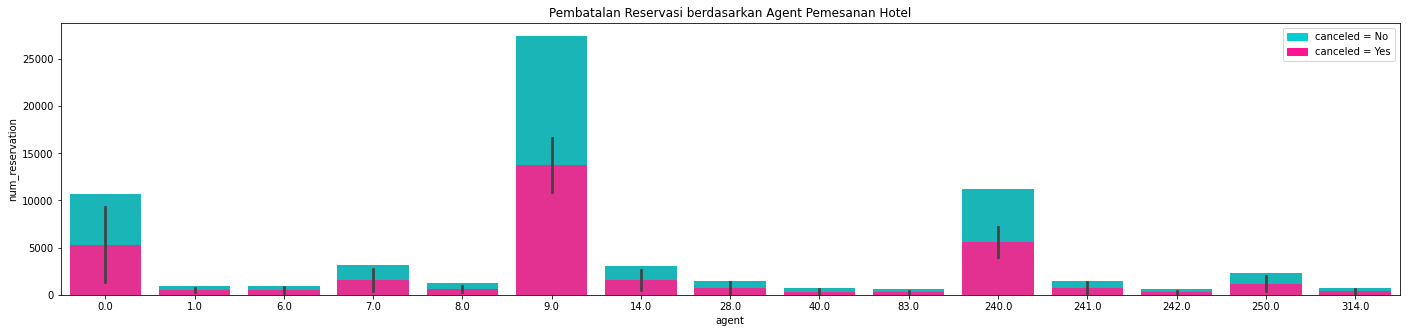

In [ ]:
plt.figure(figsize=(24, 5))

# bar chart 1 -> top bars (group of 'canceled=No')
total = num_agent_reservation.groupby('agent').agg('sum').reset_index()
bar1 = sns.barplot(x="agent",  y="num_reservation", data=total[total['agent'].isin(list(agent_top_15))], color='darkturquoise')
top_bar = mpatches.Patch(color='darkturquoise', label='canceled = No')

# bar chart 2 -> bottom bars (group of 'canceled=Yes')
canceled = num_agent_reservation.groupby(['agent','is_canceled']).agg('sum').reset_index()
bar2 = sns.barplot(x="agent", y="num_reservation", data=canceled[canceled['agent'].isin(list(agent_top_15))], color='deeppink')
bottom_bar = mpatches.Patch(color='deeppink', label='canceled = Yes')

plt.legend(handles=[top_bar, bottom_bar])
plt.title('Pembatalan Reservasi berdasarkan Agent Pemesanan Hotel')
plt.show()

Grafik di atas mengilustrasikan 15 agen pemesanan hotel dengan jumlah reservasi paling banyak. Diketahui bahwa agen yang paling banyak menerima reservasi adalah agen dengan kode 9, lalu diikuti dengan agen kode 240 dan 0. Sedangkan secara keseluruhan, tingkat pembatalan reservasi dari semua kode agen ini relatif sama meskipun jumlah reservasi nya mencapai puluhan ribu atau ribuan. 

Perlu diingat bahwa kode 0 pada kolom agent menandakan bahwa reservasi tidak dibuat melalui agen pemesanan.

##### 2.3.4 Negara Dengan Reservasi Paling Banyak

In [ ]:
num_country_reservation = df.groupby(['country','is_canceled']).count().reset_index().iloc[:,:3].sort_values(by=['hotel'],ascending=False).rename({'hotel':'num_reservation'}, axis=1)
country_top_15 = num_country_reservation.groupby('country').agg('sum').sort_values(by='num_reservation',ascending=False).head(15).index
country_top_15

Index(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD',
       'USA', 'CHE', 'CN', 'AUT', 'CHN'],
      dtype='object', name='country')

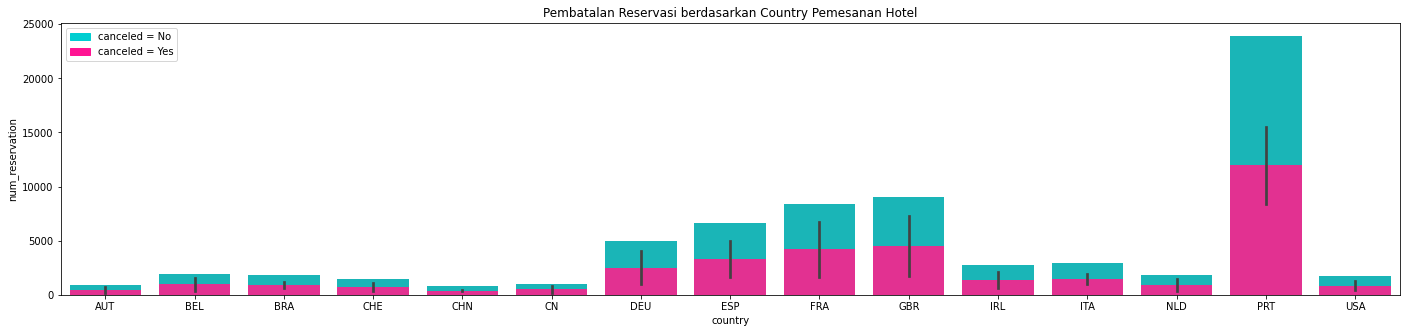

In [ ]:
plt.figure(figsize=(24, 5))

# bar chart 1 -> top bars (group of 'canceled=No')
total = num_country_reservation.groupby('country').agg('sum').reset_index()
bar1 = sns.barplot(x="country",  y="num_reservation", data=total[total['country'].isin(list(country_top_15))], color='darkturquoise')
top_bar = mpatches.Patch(color='darkturquoise', label='canceled = No')

# bar chart 2 -> bottom bars (group of 'canceled=Yes')
canceled = num_country_reservation.groupby(['country','is_canceled']).agg('sum').reset_index()
bar2 = sns.barplot(x="country", y="num_reservation", data=canceled[canceled['country'].isin(list(country_top_15))], color='deeppink')
bottom_bar = mpatches.Patch(color='deeppink', label='canceled = Yes')

plt.legend(handles=[top_bar, bottom_bar])
plt.title('Pembatalan Reservasi berdasarkan Country Pemesanan Hotel')
plt.show()

3 Negara asal pelanggan yang banyak melakukan reservasi adalah Portugal, lalu Inggris, dan Prancis. Alasan kenapa Negara dengan reservasi terbanyak adalah Portugal karena dataset ini berasal dari Portugal. Maka dari itu akan ditambahkan kolom baru **visitor** dimana isinya merupakan binomial 0 dan 1. Nilai 0 menunjukan pengunjung lokal (Portugal) dan nilai 1 menunjungan pengunjung mancanegara. 

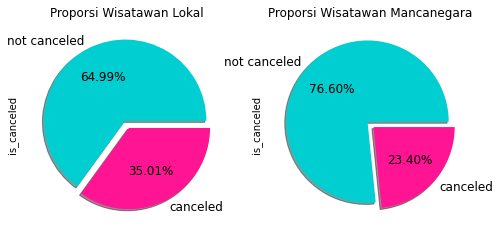

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df1[df1['visitor']==0]['is_canceled'].value_counts().plot.pie(explode=[0.05,0.05],labels=['not canceled','canceled'], autopct='%1.2f%%', shadow=True, figsize=(8, 8), fontsize=12,colors=['darkturquoise','deeppink'])
plt.title('Proporsi Wisatawan Lokal')

plt.subplot(1,2,2)
df1[df1['visitor']==1]['is_canceled'].value_counts().plot.pie(explode=[0.05,0.05],labels=['not canceled','canceled'],  autopct='%1.2f%%', shadow=True, figsize=(8, 8), fontsize=12,colors=['darkturquoise','deeppink'])
plt.title('Proporsi Wisatawan Mancanegara')

plt.show()

Hasil plot data nya menunjukkan bahwa tingkat pembatalan reservasi oleh wisatawan lokal lebih besar dibandingkan dengan wisatawan mancanegara, dengan selisih hingga 11.61%.

##### 2.3.5 Market Segment

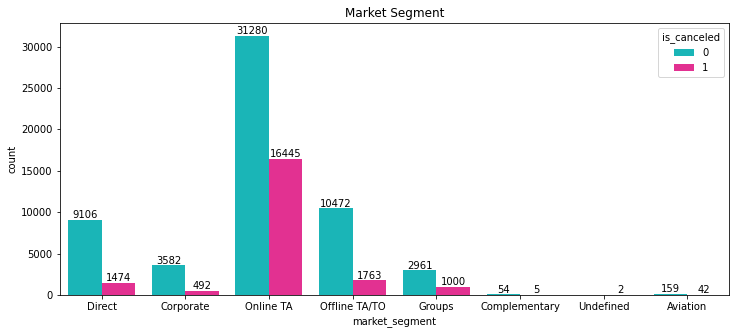

In [ ]:
plt.figure(figsize=(12,5))

ax = sns.countplot(data=df1,x='market_segment',hue='is_canceled',palette=['darkturquoise','deeppink'])
for p in ax.patches:
 height = p.get_height()
 ax.text(x = p.get_x()+(p.get_width()/2),
        y = height+200,
        s = '{:.0f}'.format(height),
        ha = 'center')
 plt.title('Market Segment')
plt.show()


Market segment yang mendominasi adalah reservasi dari online travel agent. Namun jika dilihat persentase pembatalannya juga paling tinggi dari online travel agent yang mencapai 34.45% nya. Sedangkan yang tingkat pembatalannya paling rendah ada reservasi oleh complementary dan corporate.

In [ ]:
pd.crosstab(index=df1['market_segment'], columns=df1['is_canceled'], normalize='index').T

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
is_canceled,,,,,,,,
0,0.791045,0.915254,0.879234,0.860681,0.747539,0.855905,0.655422,0.0
1,0.208955,0.084746,0.120766,0.139319,0.252461,0.144095,0.344578,1.0


##### 2.3.6 Deposit Type

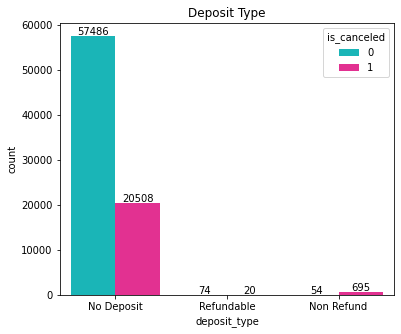

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df1,x='deposit_type',hue='is_canceled',palette=['darkturquoise','deeppink'])
for p in ax.patches:
 height = p.get_height()
 ax.text(x = p.get_x()+(p.get_width()/2),
        y = height+200,
        s = '{:.0f}'.format(height),
        ha = 'center')
plt.title('Deposit Type')
plt.show()

In [ ]:
pd.crosstab(index=df1['deposit_type'], columns=df1['is_canceled'], normalize='index').T

deposit_type,No Deposit,Non Refund,Refundable
is_canceled,,,
0,0.737057,0.072096,0.787234
1,0.262943,0.927904,0.212766


Sedangkan tipe deposit 

Hubungan antara **deposit_type** dengan **Is_canceled** menunjukan bahwa tipe deposit yang disyaratkan oleh hotel mempengaruhi pelanggan untuk melakukan pembatalan pesanan. Hal ini dapat dilihat dimana hotel yang menerapkan sistem deposit yang tidak bisa dikembalikan cenderung membatalkan pesananya.

### 2.4 Customer Reservation History

##### 2.4.1 Customers Profile

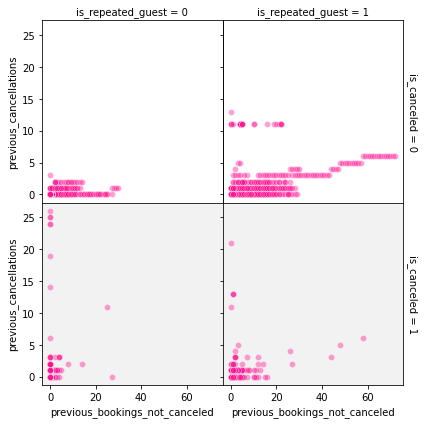

In [ ]:
g = sns.FacetGrid(df1, col="is_repeated_guest",  row="is_canceled", margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="previous_bookings_not_canceled", y="previous_cancellations",color='deeppink',alpha=0.4)
g.figure.subplots_adjust(wspace=0, hspace=0)
for (row_val, col_val), ax in g.axes_dict.items():
    if row_val == 1 :
        ax.set_facecolor(".95")
    else:
        ax.set_facecolor((0, 0, 0, 0))

plt.show()

Sebaran titik-titik data pada grafik di atas menunjukkan bahwa pada reservasi yang dibatalkan, pelanggan cenderung memiliki jumlah previous_bookings_not_canceled dan previous_cancellations yang lebih sedikit. Jika diperiksa lebih lanjut, maka pada previous_bookings_not_canceled=0 dan previous_cancellations=0, tingkat pembatalannya mencapai 0.27 dan 0.26.

In [ ]:
pd.crosstab(index=df1['previous_bookings_not_canceled'], columns=df1['is_canceled'],normalize=True).T

previous_bookings_not_canceled,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
is_canceled,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.692987,0.015817,0.006317,0.00364,0.002486,0.001953,0.001268,0.000901,0.000761,0.000634,0.000495,0.000393,0.000342,0.000279,0.000266,0.000190,0.000203,0.000152,0.00014,0.000114,0.000114,0.000127,0.000114,0.000076,0.000101,0.000101,0.000063,0.000076,0.000063,0.000051,0.000038,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013
1,0.267336,0.000698,0.000381,0.00019,0.000127,0.000114,0.000025,0.000038,0.000038,0.000000,0.000038,0.000025,0.000038,0.000013,0.000025,0.000013,0.000013,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000013,0.000013,0.000025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
pd.crosstab(index=df1['previous_cancellations'], columns=df1['is_canceled'],normalize=True).head().T

previous_cancellations,0,1,2,3,4
is_canceled,,,,,
0,0.724926,0.003818,0.000774,0.000482,0.000127
1,0.257024,0.011403,0.000342,0.000190,0.000025


Pelanggan baru yang belum pernah melakukan reservasi sebelumnya juga didapati memiliki kecenderungan untuk melakukan pembatalan reservasi lebih tinggi dengan tingkat 0.27.

In [ ]:
pd.crosstab(index=df1['is_repeated_guest'], columns=df1['is_canceled'],normalize=True).head().T

is_repeated_guest,0,1
is_canceled,,
0,0.698149,0.032650
1,0.266410,0.002791


Sehingga dapat disimpulkan bahwa pelanggan yang belum memiliki riwayat reservasi didapati memiliki kecenderungan pembatalan yang lebih tinggi.

##### 2.4.2 Customers Requests

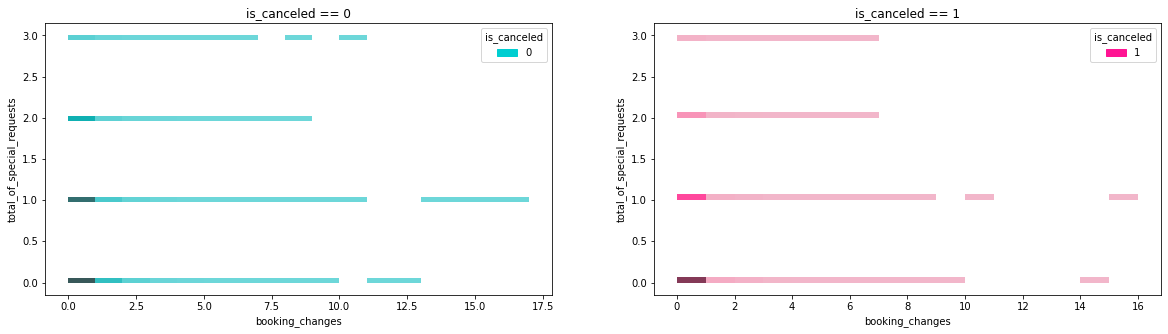

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
sns.histplot(data=df1[df1['is_canceled']==0],x='booking_changes',y='total_of_special_requests',hue='is_canceled',palette=['darkturquoise'])
plt.title('is_canceled == 0')

plt.subplot(1,2,2)
sns.histplot(data=df1[df1['is_canceled']==1],x='booking_changes',y='total_of_special_requests',hue='is_canceled',palette=['deeppink'])
plt.title('is_canceled == 1')

plt.show()

Berdasarkan tipe permintaan pelanggan, semakin sedikit booking_changes dan total_of_special_requests yang dibuat oleh pelanggan maka tingkat pembatalan reservasi tersebut menjadi semakin besar. Hal ini ditunjukkan oleh warna yang lebih gelap pada saat titik x,y mendekati 0.

##### 2.4.2 Room Type Differences

Sedangkan perbedaan tipe kamar yang dipesan dengan yang didapatkan tidak menunjukkan adanya pengaruh yang signifikan untuk pelanggan membatalkan reservasinya.

In [ ]:
pd.crosstab(index=df1['is_room_diff'], columns=df1['is_canceled'],normalize='index').T

is_room_diff,0,1
is_canceled,,
0,0.691691,0.9534
1,0.308309,0.0466


### 2.5 Dashboard [Tableau](https://public.tableau.com/views/HotelBookings_16631504869120/Dashboard1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link)

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1663766431447' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16631504869120&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HotelBookings_16631504869120&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;HotelBookings_16631504869120&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1663766431447');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1600px';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1600px';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<iframe src="https://public.tableau.com/views/HotelBookings_16631504869120/Dashboard1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link:showVizHome=no&:embed=true"
 width="1300" height="1400"></iframe>

## Statistical Measurement

Pengukuran statistik ini dilakukan sebagai upaya untuk menyeleksi variabel-variabel yang akan digunakan untuk fitur pemodelan, yang meliputi pemeriksaan korelasi dan multikolinearitas data.

### Data Correlation for Numerical Type

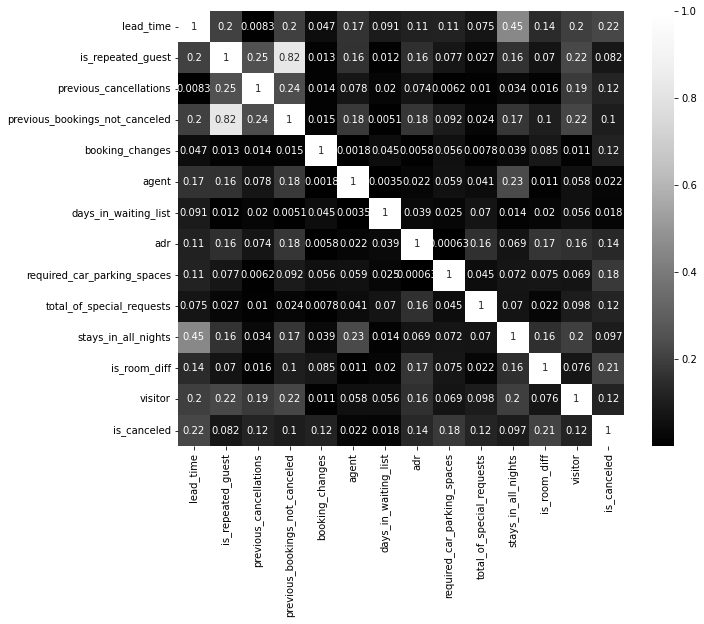

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data=abs(df1.corr(method='spearman')),cmap='Greys_r',annot=True)
plt.show()

In [ ]:
abs(df1.corr(method='spearman')['is_canceled']).sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.222933
is_room_diff                      0.210359
required_car_parking_spaces       0.183683
adr                               0.135558
previous_cancellations            0.123578
total_of_special_requests         0.122580
visitor                           0.120306
booking_changes                   0.116595
previous_bookings_not_canceled    0.101779
stays_in_all_nights               0.096787
is_repeated_guest                 0.082310
agent                             0.021788
days_in_waiting_list              0.017847
Name: is_canceled, dtype: float64

### Data Correlation for Object Type

In [ ]:
import dython
from dython.nominal import correlation_ratio

objt = df1.columns[df1.dtypes == 'object']

feat = []

for i in objt:
    corr = round(correlation_ratio(df1[i], df1['is_canceled']), 4)
    feat.append(corr)

# korelasi feature dengan tipe data objek terhadap feature target(dependent variable)
df1_cor_ratio = pd.DataFrame(data = [feat], columns = objt, index=['is_canceled'])
df1_cor_ratio.T.sort_values(by='is_canceled',ascending=False)

,is_canceled
market_segment,0.2178
country,0.1889
deposit_type,0.1455
arrival_date_mmyy,0.1261
customer_type,0.1231
hotel,0.0774


Secara keseluruhan, skor korelasi variabel-variabel ini berada di bawah nilai minimal untuk sebuah variabel dapat dikatakan berkorelasi. Namun, hal ini tidak berarti semua variabel tersebut tidak dapat digunakan sebaagi fitur model. Karena bisa jadi, variabel-variabel tersebut akan lebih bermakna saat digunakan bersama sebagai fitur pemodelan.

### Multicolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78837 entries, 2 to 87395
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           78837 non-null  object        
 1   lead_time                       78837 non-null  int64         
 2   country                         78837 non-null  object        
 3   market_segment                  78837 non-null  object        
 4   is_repeated_guest               78837 non-null  int64         
 5   previous_cancellations          78837 non-null  int64         
 6   previous_bookings_not_canceled  78837 non-null  int64         
 7   booking_changes                 78837 non-null  int64         
 8   deposit_type                    78837 non-null  object        
 9   agent                           78837 non-null  float64       
 10  days_in_waiting_list            78837 non-null  int64         
 11  cu

In [ ]:
X1 = df1.drop(['hotel','country','market_segment','deposit_type','customer_type','arrival_date_full', 'arrival_date_mmyy','is_canceled'], axis=1)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns

In [ ]:
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]
  
print(vif_data)

                           feature       VIF
0   lead_time                       2.385999
1   is_repeated_guest               1.304061
2   previous_cancellations          1.185751
3   previous_bookings_not_canceled  1.418637
4   booking_changes                 1.154993
5   agent                           1.598370
6   days_in_waiting_list            1.028966
7   adr                             4.221151
8   required_car_parking_spaces     1.139414
9   total_of_special_requests       1.789856
10  stays_in_all_nights             4.154393
11  is_room_diff                    1.158163
12  visitor                         3.256445


Dilihat dari hasil perhitungan VIF untuk menguji multicolinierity menunjukan tidak ada indikasi bahwa variabel independen (feature) saling berkorelasi satu dengan yang lainnya.

## Variables to be Used in The Model

Setelah dilakukan pemeriksaan korelasi dan multikolinearitas data, serta dengan mempertimbangkan analisis domain knowledge, maka variabel-variabel yang akan digunakan sebagai fitur pada model machine learning yaitu:

* hotel
* lead_time
* market_segment
* is_repeated_guest
* previous_cancellations
* previous_bookings_not_canceled
* booking_changes
* deposit_type
* days_in_waiting_list
* customer_type
* adr
* required_car_parking_spaces
* total_of_special_requests 
* stays_in_all_nights 
* is_room_diff
* visitor
* is_canceled

# <center> **DATA PREPARATION** <center/>
----
----


## Feature Engineering

Feature Engineering bertujuan untuk memberikan input yang lebih baik untuk machine learning. Ada beberapa cara untuk melakukan feature engineering, salah satunya adalah encoding. Encoding adalah suatu metode yang dapat diterapkan untuk merepresentasikan variabel kategorik dalam machine learning. Ada berbagai macam jenis metode encoding yaitu one hot encoding, ordinal encoding, dan binary encoding.

### Encoding

In [ ]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown = 'ignore'), ['hotel', 'market_segment', 'deposit_type', 'customer_type']),
    ('Binary', ce.BinaryEncoder(), ['arrival_date_mmyy'])
], remainder='passthrough')

### Scaling

In [ ]:
scaler = RobustScaler()

# <center> **MODELING AND ANALYSIS** <center/>
----
----


## Data Splitting

In [ ]:
x = df1.drop(['is_canceled','arrival_date_full','country','agent'], axis=1) #Drop variabel-variabel yang tidak digunakan sebagai fitur
y = df1['is_canceled']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 stratify=y,
                                                 test_size=0.2,
                                                 random_state=42)

In [ ]:
print(x_train.shape, x_test.shape)

(63069, 17) (15768, 17)


### Model Features

Dengan demikian, maka fitur-fitur yang akan menjadi input model adalah sebagai berikut:

In [ ]:
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names())
testing.columns

Index(['One Hot__x0_Resort Hotel', 'One Hot__x1_Complementary',
       'One Hot__x1_Corporate', 'One Hot__x1_Direct', 'One Hot__x1_Groups',
       'One Hot__x1_Offline TA/TO', 'One Hot__x1_Online TA',
       'One Hot__x1_Undefined', 'One Hot__x2_Non Refund',
       'One Hot__x2_Refundable', 'One Hot__x3_Group', 'One Hot__x3_Transient',
       'One Hot__x3_Transient-Party', 'Binary__arrival_date_mmyy_0',
       'Binary__arrival_date_mmyy_1', 'Binary__arrival_date_mmyy_2',
       'Binary__arrival_date_mmyy_3', 'Binary__arrival_date_mmyy_4',
       'lead_time', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'stays_in_all_nights', 'is_room_diff',
       'visitor'],
      dtype='object')

## Modeling and Evaluation

### Training and Validation

In [ ]:
# Model
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

### Balancing with Oversampling

In [ ]:
# Balancing : Oversampling

smote = SMOTE(random_state=42)

models = [logreg,knn,dt,rf,ada,gb,xgb]

score_recall=[]
rata_recall=[]
std_recall=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scale', scaler),
        ('imbalance',smote),
        ('model',i)])

    #Recall
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='recall')
    score_recall.append(model_cv)
    rata_recall.append(model_cv.mean())
    std_recall.append(model_cv.std())
    
pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost','GradientBoost','XGBoost'],
    'mean Recall':rata_recall,
    'sdev Recall':std_recall,
    }).set_index('model')

,mean Recall,sdev Recall
model,,
Logistic Regression,0.794911,0.003961
KNN,0.754683,0.002568
Decision Tree,0.643657,0.005579
Random Forest,0.687595,0.004640
AdaBoost,0.777241,0.004966
GradientBoost,0.801331,0.004334
XGBoost,0.820356,0.004872


### Balancing with Undersampling

In [ ]:
# Balancing : Undersampling

rus = RandomUnderSampler(random_state=42)

models = [logreg,knn,dt,rf,ada,gb,xgb]

score_recall=[]
rata_recall=[]
std_recall=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scale', scaler),
        ('imbalance',rus),
        ('model',i)])

    #Recall
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='recall')
    score_recall.append(model_cv)
    rata_recall.append(model_cv.mean())
    std_recall.append(model_cv.std())
    
pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost','GradientBoost','XGBoost'],
    'mean Recall':rata_recall,
    'sdev Recall':std_recall,
    }).set_index('model')

,mean Recall,sdev Recall
model,,
Logistic Regression,0.796678,0.004183
KNN,0.796913,0.007914
Decision Tree,0.741960,0.005043
Random Forest,0.816586,0.005426
AdaBoost,0.799328,0.003264
GradientBoost,0.833549,0.004809
XGBoost,0.841206,0.007301


Secara keseluruhan, handling imbalance dengan metode undersampling menghasilkan rata-rata skor recall yang relatif lebih tinggi dibandingkan dengan oversampling. Sedangkan XGBoost dan Gradient Boost, sama-sama mengungguli 5 model lainnya dalam 2 metode handling imbalance tersebut. Dengan demikian,  pada tahap prediction akan dilihat lagi model mana yang meberikan nilai terbaik  antara XGboost atau Gradient Boost dengan handling imbalance proses undersampling.

### Prediction

In [ ]:
models1 = [gb, xgb]

score_recall = []

# Prediksi pada test set
for i in models1:

    model = Pipeline([
        ('preprocess',transformer),
        ('scale',scaler),
        ('imbalance',rus),
        ('model', i)
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_recall.append(recall_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'recall': score_recall}, index=['gb','xgb'])
score_before_tuning


,recall
gb,0.834629
xgb,0.838398


Hasil prediksinya menunjukkan bahwa model XGBoost menggungguli Gradient Boosting dalam mengurangi false negatif hasil prediksi, yaitu prediksi sebuah reservasi tidak akan dibatalkan namun hasil aktualnya reservasi tersebut dibatalkan.

### Hyperparameter Tuning

Dengan demikian, optimalisasi performa model machine learning akan dilakukan dengan menerapkan hyperparameter tuning pada model XGBoost untuk mendapatkan parameter yang paling efektif dalam meningkatkan recall.

#### XGBoost

XGBoost adalah library yang mengoptimasi gradient boosting yang dirancang agar sangat efisien, fleksibel dan portable. XGBoost mengimplementasikan algoritma seperti Gradient Boosting. Terdapat beberapa tambahan yang membedakan XGBoost dengan Gradient Boost yaitu pemangkasan, newton boosting, dan parameter pengacakan ekstra. Proses pemangkasan atau penyusutan daun(leaf) digunakan untuk meningkatkan generalisasi model. Proses newton boosting adalah proses untuk menyediakan rute langsung sehingga tidak memerlukan penurunan gradient. Proses pengacakan parameter bertujuan untuk mengurangi korelasi antar tree sehingga dapat meningkatkan kekuatan algoritma ensemble [(chen at al, 2016)](https://dl.acm.org/doi/10.1145/2939672.2939785)

sumber lain: https://www.dqlab.id/algoritma-machine-learning-yang-perlu-dipelajari

#### Parameter Setting

In [ ]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

Pada tahap parameter setting terdapat 712800000 kombinasi, maka dari itu tunning dilakukan dengan menggunakan Randomized Search dibanding dengan menggunakan Grid Search karena akan memakan waktu yang lebih lama, walaupun hasil yang didapatkan lebih maksimal menggunakan Grid Search

#### Cross-Validation

In [ ]:
# Model dengan hyperparameter tuning
xgb = XGBClassifier(random_state=42)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('imbalance',rus),
        ('model', xgb)
        ])

crossval = StratifiedKFold(n_splits=5)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = 'recall', 
    n_jobs = -1,
    random_state = 42  
)

In [ ]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['hotel',
                                                                                'market_segment',
                                                                                'deposit_type',
                                                                                'c

In [ ]:
# Cek skor dan parameter terbaik
print('Best score xgb:', random_xgb.best_score_)
print('Best params xgb:', random_xgb.best_params_)

Best score xgb: 0.875839513175858
Best params xgb: {'model__subsample': 0.6, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 122, 'model__max_depth': 2, 'model__learning_rate': 0.01, 'model__gamma': 3, 'model__colsample_bytree': 0.6}


#### Prediction

In [ ]:
# Model XGBoost
model = xgb

#define model berdasarkan estimator terbaik
xgb_tuning = random_xgb.best_estimator_

#Fitting model
xgb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

# Menyimpan nilai metric
f1_xgb_tuning = f1_score(y_test, y_pred_xgb_tuning)
recall_xgb_tuning = recall_score(y_test, y_pred_xgb_tuning)
precision_xgb_tuning = precision_score(y_test, y_pred_xgb_tuning)
accuracy_xgb_tuning = accuracy_score(y_test, y_pred_xgb_tuning)

score_xgb_after_tuning = pd.DataFrame({'recall': recall_xgb_tuning}, index=['xgb'])
score_xgb_after_tuning

,recall
xgb,0.874205


#### Evaluation

In [ ]:
print('Skor Recall Before',score_before_tuning.loc['xgb'])
print('Skor Recall After',score_xgb_after_tuning.loc['xgb'])

Skor Recall Before recall    0.838398
Name: xgb, dtype: float64
Skor Recall After recall    0.874205
Name: xgb, dtype: float64


In [ ]:
report_default = classification_report(y_test, y_pred)
report_tuned = classification_report(y_test, y_pred_xgb_tuning)

print('Classification Report Default XGB : \n', report_default)
print('Classification Report Tuned XGB : \n', report_tuned)

Classification Report Default XGB : 
               precision    recall  f1-score   support

           0       0.92      0.73      0.81     11523
           1       0.53      0.84      0.65      4245

    accuracy                           0.76     15768
   macro avg       0.73      0.78      0.73     15768
weighted avg       0.82      0.76      0.77     15768

Classification Report Tuned XGB : 
               precision    recall  f1-score   support

           0       0.93      0.64      0.76     11523
           1       0.47      0.87      0.61      4245

    accuracy                           0.70     15768
   macro avg       0.70      0.76      0.68     15768
weighted avg       0.81      0.70      0.72     15768



## Analysis

### Feature Importance

In [ ]:
feature_importance = random_xgb.best_estimator_._final_estimator.feature_importances_

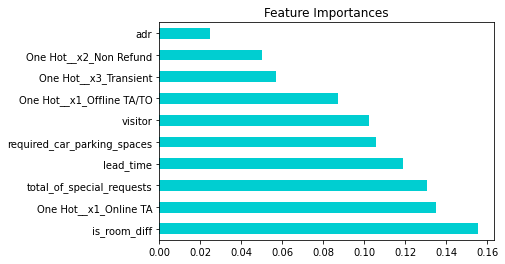

In [ ]:
feature = pd.Series(feature_importance, transformer.get_feature_names()).sort_values(ascending = False).head(10)
feature.plot(kind='barh', title='Feature Importances',color='darkturquoise')
plt.show()

Hasil diatas menunjukan urutan fitur-fitur yang penting berdasarkan model XGBoost. Dalam hal ini fitur is_room_diff paling penting, dimana perbedaan kamar yang dipilih dan diberikan sangat mempengaruhi pembatalan hotel. Selain itu, jika kita lihat fitur Online TA juga sangat mempengaruhi pembatalan. Hal ini sesuai dengan bisnis understanding yang telah disampaikan diawal bahwasannya kemudahan akses informasi sangat berdampak pada mudahnya pembatalan hotel

### Financial Gain

Berikut adalah keuntungan secara finansial ketika perusahaan (hotel) menggunakan model machine learning untuk memprediksi seorang konsumen melakukan pembatalan pesanan hotel.

In [ ]:
actual = pd.DataFrame(y_test)

In [ ]:
actual.rename(columns = {'is_canceled' : 'actual'}, inplace = True)

In [ ]:
prediction = pd.DataFrame(y_pred, columns = ['prediction'])

In [ ]:
adr = x_test['adr']

In [ ]:
adr = pd.DataFrame(adr)

In [ ]:
merge = pd.concat([adr, actual], axis=1, sort=False).reset_index()

In [ ]:
merge.drop('index', axis=1, inplace=True)

In [ ]:
merge1 = pd.concat([merge, prediction], axis=1, sort=False).reset_index()

In [ ]:
merge1.loc[(merge1['actual'] == 1) & (merge1['prediction'] == 1), 'adr'].sum()

409482.89

Berdasarkan perhitungan ketika machine learning mampu memprediksi konsumen untuk melakukan pembatalan reservasi hotel, diperkirakan perusahaan(hotel) mampu meningkatkan potensi pendapatan sebesar €409,482.89 selama periode 2015-2017.
Perhitungan tersebut didapatkan dari total harga kamar ketika nilai **actual** dan **prediction** bernilai 1 (membatalkan reservasi) .

# <center> **SUMMARY AND RECOMMENDATION** <center/>
----
----


## Conclusion

1. Hasil machine learning menunjukkan :
> - Model XGBoost memiliki performa paling baik
> - Model dapat meminimalkan prediksi pelanggan yang melakukan pembatalan namun dianggap tidak melakukan pembatalan dengan medel matrix Recall. Dalam hal ini, model mampu memprediksi 87% yang melakukan pembatalan reservasi hotel.

2. Jika program ini diterapkan, perusahaan setidaknya dapat meningkatkan potensi pendapatan sebesar €409,482.89 selama periode 2015-2017.
3. Berdasarkan dataset [Hotel Booking](https://reader.elsevier.com/reader/sd/pii/S2352340918315191?token=F10D385230C44E8F9B8A1A8C259584E038AE9988D403B56CA8FA20BF2989916B124077A6EA1655A3E26E85177F3D5AE8&originRegion=eu-west-1&originCreation=20220902124733) faktor yang paling berpengaruh besar dalam menentukan sebuah reservasi akan dibatalkan atau tidak adalah is_room_diff (perbedaan kamar yang diminta oleh pelanggan dengan yang diberikan oleh hotel).
4. Ada beberapa batasan yang ditarapkan dalam model prediksi ini, yaitu:
>- Model hanya mampu memprediksi **lead_time** dengan batasan 0 sampai dengan 296 hari.
>- Model hanya mampu memprediksi **stays_in_all_nights** dengan batasan 0 sampai dengan 10 hari.
>- Model hanya mampu memprediksi **adr** dengan batasan €0 sampai dengan €227.
>- Model hanya mampu memprediksi **total of special request** dengan batasan 0 sampai dengan 3
<br>


## Recommendation

Untuk pengembangan model selanjutnya, maka rekomendasi yang dapat dilakukan adalah:

1. Menggunakan fitur-fitur yang efektif dalam memprediksi pembatalan reservasi oleh pelanggan. Misalnya dengan mengurangi jumlah fitur berdasarkan skor feature importances fitur tersebut terhadap model atau dengan menambahkan fitur yang memiliki nilai korelasi yang baik terhadap variabel **Is_canceled**. Pengujian korelasi menunjukan bahwa sebenarnya variabel yang digunakan berkorelasi rendah terhadap fitur **Is_canceled**. Salah satu cara untuk memperoleh fitur apa saja yang memiliki nilai korelasi yang baik adalah dengan melihat penelitian-penelitian terdahulu melalui jurnal penelitian yang berkaitan dengan variabel-variabel yang mempengaruhi pilihan konsumen untuk tidak membatalkan reservasi hotel.
2. Menerapkan manipulasi data dengan log transform, square root transform, dsb supaya distribusi data yang bertipe numerik dapat mendekati normal.

Demikian rekomendasi yang dapat diberikan supaya model yang dikembangkan selanjutnya dapat menghasilkan akurasi yang lebih baik. 

# <center> **MODEL PICKLE** <center/>
----
----


In [ ]:
# Save model
import pickle

estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('imbalance',rus),
        ('model', xgb)
        ])
estimator.fit(x_train, y_train)

pickle.dump(estimator, open('Hotel_Booking_XGB.sav', 'wb'))

In [ ]:
# Load model
filename = 'Hotel_Booking_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

recall_score(y_test, loaded_model.predict(x_test))

0.8383981154299176